# Geometry and Linear Algebraic Operations
:label:`sec_geometry-linear-algebraic-ops`

In :numref:`sec_linear-algebra`, we encountered the basics of linear algebra
and saw how it could be used to express common operations for transforming our data.
Linear algebra is one of the key mathematical pillars
underlying much of the work that we do in deep learning
and in machine learning more broadly.
While :numref:`sec_linear-algebra` contained enough machinery
to communicate the mechanics of modern deep learning models,
there is a lot more to the subject.
In this section, we will go deeper,
highlighting some geometric interpretations of linear algebra operations,
and introducing a few fundamental concepts, including of eigenvalues and eigenvectors.

## Geometry of Vectors
First, we need to discuss the two common geometric interpretations of vectors,
as either points or directions in space.
Fundamentally, a vector is a list of numbers such as the Python list below.


In [1]:
v = [1, 7, 0, 1]

Mathematicians most often write this as either a *column* or *row* vector, which is to say either as

$$
\mathbf{x} = \begin{bmatrix}1\\7\\0\\1\end{bmatrix},
$$

or

$$
\mathbf{x}^\top = \begin{bmatrix}1 & 7 & 0 & 1\end{bmatrix}.
$$

These often have different interpretations,
where data examples are column vectors
and weights used to form weighted sums are row vectors.
However, it can be beneficial to be flexible.
As we have described in :numref:`sec_linear-algebra`,
though a single vector's default orientation is a column vector,
for any matrix representing a tabular dataset,
treating each data example as a row vector
in the matrix
is more conventional.

Given a vector, the first interpretation
that we should give it is as a point in space.
In two or three dimensions, we can visualize these points
by using the components of the vectors to define
the location of the points in space compared
to a fixed reference called the *origin*.  This can be seen in :numref:`fig_grid`.

![An illustration of visualizing vectors as points in the plane.  The first component of the vector gives the $\mathit{x}$-coordinate, the second component gives the $\mathit{y}$-coordinate.  Higher dimensions are analogous, although much harder to visualize.](../img/grid-points.svg)
:label:`fig_grid`

This geometric point of view allows us to consider the problem on a more abstract level.
No longer faced with some insurmountable seeming problem
like classifying pictures as either cats or dogs,
we can start considering tasks abstractly
as collections of points in space and picturing the task
as discovering how to separate two distinct clusters of points.

In parallel, there is a second point of view
that people often take of vectors: as directions in space.
Not only can we think of the vector $\mathbf{v} = [3,2]^\top$
as the location $3$ units to the right and $2$ units up from the origin,
we can also think of it as the direction itself
to take $3$ steps to the right and $2$ steps up.
In this way, we consider all the vectors in figure :numref:`fig_arrow` the same.

![Any vector can be visualized as an arrow in the plane.  In this case, every vector drawn is a representation of the vector $(3,2)^\top$.](../img/par-vec.svg)
:label:`fig_arrow`

One of the benefits of this shift is that
we can make visual sense of the act of vector addition.
In particular, we follow the directions given by one vector,
and then follow the directions given by the other, as is seen in :numref:`fig_add-vec`.

![We can visualize vector addition by first following one vector, and then another.](../img/vec-add.svg)
:label:`fig_add-vec`

Vector subtraction has a similar interpretation.
By considering the identity that $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$,
we see that the vector $\mathbf{u}-\mathbf{v}$ is the direction
that takes us from the point $\mathbf{v}$ to the point $\mathbf{u}$.


## Dot Products and Angles
As we saw in :numref:`sec_linear-algebra`,
if we take two column vectors $\mathbf{u}$ and $\mathbf{v}$,
we can form their dot product by computing:

$$\mathbf{u}^\top\mathbf{v} = \sum_i u_i\cdot v_i.$$
:eqlabel:`eq_dot_def`

Because :eqref:`eq_dot_def` is symmetric, we will mirror the notation
of classical multiplication and write

$$
\mathbf{u}\cdot\mathbf{v} = \mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u},
$$

to highlight the fact that exchanging the order of the vectors will yield the same answer.

The dot product :eqref:`eq_dot_def` also admits a geometric interpretation: it is closely related to the angle between two vectors.  Consider the angle shown in :numref:`fig_angle`.

![Between any two vectors in the plane there is a well defined angle $\theta$.  We will see this angle is intimately tied to the dot product.](../img/vec-angle.svg)
:label:`fig_angle`

To start, let's consider two specific vectors:

$$
\mathbf{v} = (r,0) \; \textrm{and} \; \mathbf{w} = (s\cos(\theta), s \sin(\theta)).
$$

The vector $\mathbf{v}$ is length $r$ and runs parallel to the $x$-axis,
and the vector $\mathbf{w}$ is of length $s$ and at angle $\theta$ with the $x$-axis.
If we compute the dot product of these two vectors, we see that

$$
\mathbf{v}\cdot\mathbf{w} = rs\cos(\theta) = \|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta).
$$

With some simple algebraic manipulation, we can rearrange terms to obtain

$$
\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).
$$

In short, for these two specific vectors,
the dot product combined with the norms tell us the angle between the two vectors. This same fact is true in general. We will not derive the expression here, however,
if we consider writing $\|\mathbf{v} - \mathbf{w}\|^2$ in two ways:
one with the dot product, and the other geometrically using the law of cosines,
we can obtain the full relationship.
Indeed, for any two vectors $\mathbf{v}$ and $\mathbf{w}$,
the angle between the two vectors is

$$\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).$$
:eqlabel:`eq_angle_forumla`

This is a nice result since nothing in the computation references two-dimensions.
Indeed, we can use this in three or three million dimensions without issue.

As a simple example, let's see how to compute the angle between a pair of vectors:


In [1]:
import numpy, torch, matplotlib, d2l
print("NumPy:", numpy.__version__)
print("Torch:", torch.__version__)
print("Matplotlib:", matplotlib.__version__)
print("D2L:", d2l.__version__)


NumPy: 1.23.5
Torch: 2.9.0+cu128
Matplotlib: 3.7.2
D2L: 1.0.3


In [2]:
from d2l import torch as d2l
d2l.use_svg_display()
d2l.set_figsize()
print("D2L and NumPy binary compatibility: OK")


D2L and NumPy binary compatibility: OK


In [3]:
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l



def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)

We will not use it right now, but it is useful to know
that we will refer to vectors for which the angle is $\pi/2$
(or equivalently $90^{\circ}$) as being *orthogonal*.
By examining the equation above, we see that this happens when $\theta = \pi/2$,
which is the same thing as $\cos(\theta) = 0$.
The only way this can happen is if the dot product itself is zero,
and two vectors are orthogonal if and only if $\mathbf{v}\cdot\mathbf{w} = 0$.
This will prove to be a helpful formula when understanding objects geometrically.

It is reasonable to ask: why is computing the angle useful?
The answer comes in the kind of invariance we expect data to have.
Consider an image, and a duplicate image,
where every pixel value is the same but $10\%$ the brightness.
The values of the individual pixels are in general far from the original values.
Thus, if one computed the distance between the original image and the darker one,
the distance can be large.
However, for most ML applications, the *content* is the same---it is still
an image of a cat as far as a cat/dog classifier is concerned.
However, if we consider the angle, it is not hard to see
that for any vector $\mathbf{v}$, the angle
between $\mathbf{v}$ and $0.1\cdot\mathbf{v}$ is zero.
This corresponds to the fact that scaling vectors
keeps the same direction and just changes the length.
The angle considers the darker image identical.

Examples like this are everywhere.
In text, we might want the topic being discussed
to not change if we write twice as long of document that says the same thing.
For some encoding (such as counting the number of occurrences of words in some vocabulary), this corresponds to a doubling of the vector encoding the document,
so again we can use the angle.

### Cosine Similarity
In ML contexts where the angle is employed
to measure the closeness of two vectors,
practitioners adopt the term *cosine similarity*
to refer to the portion
$$
\cos(\theta) = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

The cosine takes a maximum value of $1$
when the two vectors point in the same direction,
a minimum value of $-1$ when they point in opposite directions,
and a value of $0$ when the two vectors are orthogonal.
Note that if the components of high-dimensional vectors
are sampled randomly with mean $0$,
their cosine will nearly always be close to $0$.


## Hyperplanes

In addition to working with vectors, another key object
that you must understand to go far in linear algebra
is the *hyperplane*, a generalization to higher dimensions
of a line (two dimensions) or of a plane (three dimensions).
In an $d$-dimensional vector space, a hyperplane has $d-1$ dimensions
and divides the space into two half-spaces.

Let's start with an example.
Suppose that we have a column vector $\mathbf{w}=[2,1]^\top$. We want to know, "what are the points $\mathbf{v}$ with $\mathbf{w}\cdot\mathbf{v} = 1$?"
By recalling the connection between dot products and angles above :eqref:`eq_angle_forumla`,
we can see that this is equivalent to
$$
\|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta) = 1 \; \iff \; \|\mathbf{v}\|\cos(\theta) = \frac{1}{\|\mathbf{w}\|} = \frac{1}{\sqrt{5}}.
$$

![Recalling trigonometry, we see the formula $\|\mathbf{v}\|\cos(\theta)$ is the length of the projection of the vector $\mathbf{v}$ onto the direction of $\mathbf{w}$](../img/proj-vec.svg)
:label:`fig_vector-project`

If we consider the geometric meaning of this expression,
we see that this is equivalent to saying
that the length of the projection of $\mathbf{v}$
onto the direction of $\mathbf{w}$ is exactly $1/\|\mathbf{w}\|$, as is shown in :numref:`fig_vector-project`.
The set of all points where this is true is a line
at right angles to the vector $\mathbf{w}$.
If we wanted, we could find the equation for this line
and see that it is $2x + y = 1$ or equivalently $y = 1 - 2x$.

If we now look at what happens when we ask about the set of points with
$\mathbf{w}\cdot\mathbf{v} > 1$ or $\mathbf{w}\cdot\mathbf{v} < 1$,
we can see that these are cases where the projections
are longer or shorter than $1/\|\mathbf{w}\|$, respectively.
Thus, those two inequalities define either side of the line.
In this way, we have found a way to cut our space into two halves,
where all the points on one side have dot product below a threshold,
and the other side above as we see in :numref:`fig_space-division`.

![If we now consider the inequality version of the expression, we see that our hyperplane (in this case: just a line) separates the space into two halves.](../img/space-division.svg)
:label:`fig_space-division`

The story in higher dimension is much the same.
If we now take $\mathbf{w} = [1,2,3]^\top$
and ask about the points in three dimensions with $\mathbf{w}\cdot\mathbf{v} = 1$,
we obtain a plane at right angles to the given vector $\mathbf{w}$.
The two inequalities again define the two sides of the plane as is shown in :numref:`fig_higher-division`.

![Hyperplanes in any dimension separate the space into two halves.](../img/space-division-3d.svg)
:label:`fig_higher-division`

While our ability to visualize runs out at this point,
nothing stops us from doing this in tens, hundreds, or billions of dimensions.
This occurs often when thinking about machine learned models.
For instance, we can understand linear classification models
like those from :numref:`sec_softmax`,
as methods to find hyperplanes that separate the different target classes.
In this context, such hyperplanes are often referred to as *decision planes*.
The majority of deep learned classification models end
with a linear layer fed into a softmax,
so one can interpret the role of the deep neural network
to be to find a non-linear embedding such that the target classes
can be separated cleanly by hyperplanes.

To give a hand-built example, notice that we can produce a reasonable model
to classify tiny images of t-shirts and trousers from the Fashion-MNIST dataset
(seen in :numref:`sec_fashion_mnist`)
by just taking the vector between their means to define the decision plane
and eyeball a crude threshold.  First we will load the data and compute the averages.


In [4]:
# Load in the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                         train=False, download=True)

X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

100.0%
100.0%
100.0%
100.0%


It can be informative to examine these averages in detail, so let's plot what they look like.  In this case, we see that the average indeed resembles a blurry image of a t-shirt.


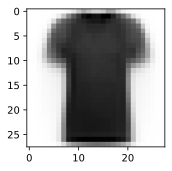

In [5]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

In the second case, we again see that the average resembles a blurry image of trousers.


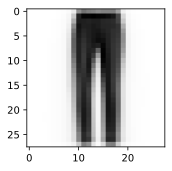

In [6]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

In a fully machine learned solution, we would learn the threshold from the dataset.  In this case, I simply eyeballed a threshold that looked good on the training data by hand.


In [7]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000

# Accuracy
torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64)

C:\Users\ntuku\AppData\Local\Temp\ipykernel_15784\3819644537.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4419.)
  w = (ave_1 - ave_0).T


tensor(0.7870, dtype=torch.float64)

## Geometry of Linear Transformations

Through :numref:`sec_linear-algebra` and the above discussions,
we have a solid understanding of the geometry of vectors, lengths, and angles.
However, there is one important object we have omitted discussing,
and that is a geometric understanding of linear transformations represented by matrices.  Fully internalizing what matrices can do to transform data
between two potentially different high dimensional spaces takes significant practice,
and is beyond the scope of this appendix.
However, we can start building up intuition in two dimensions.

Suppose that we have some matrix:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\ c & d
\end{bmatrix}.
$$

If we want to apply this to an arbitrary vector
$\mathbf{v} = [x, y]^\top$,
we multiply and see that

$$
\begin{aligned}
\mathbf{A}\mathbf{v} & = \begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \\
& = \begin{bmatrix}ax+by\\ cx+dy\end{bmatrix} \\
& = x\begin{bmatrix}a \\ c\end{bmatrix} + y\begin{bmatrix}b \\d\end{bmatrix} \\
& = x\left\{\mathbf{A}\begin{bmatrix}1\\0\end{bmatrix}\right\} + y\left\{\mathbf{A}\begin{bmatrix}0\\1\end{bmatrix}\right\}.
\end{aligned}
$$

This may seem like an odd computation,
where something clear became somewhat impenetrable.
However, it tells us that we can write the way
that a matrix transforms *any* vector
in terms of how it transforms *two specific vectors*:
$[1,0]^\top$ and $[0,1]^\top$.
This is worth considering for a moment.
We have essentially reduced an infinite problem
(what happens to any pair of real numbers)
to a finite one (what happens to these specific vectors).
These vectors are an example a *basis*,
where we can write any vector in our space
as a weighted sum of these *basis vectors*.

Let's draw what happens when we use the specific matrix

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix}.
$$

If we look at the specific vector $\mathbf{v} = [2, -1]^\top$,
we see this is $2\cdot[1,0]^\top + -1\cdot[0,1]^\top$,
and thus we know that the matrix $A$ will send this to
$2(\mathbf{A}[1,0]^\top) + -1(\mathbf{A}[0,1])^\top = 2[1, -1]^\top - [2,3]^\top = [0, -5]^\top$.
If we follow this logic through carefully,
say by considering the grid of all integer pairs of points,
we see that what happens is that the matrix multiplication
can skew, rotate, and scale the grid,
but the grid structure must remain as you see in :numref:`fig_grid-transform`.

![The matrix $\mathbf{A}$ acting on the given basis vectors.  Notice how the entire grid is transported along with it.](../img/grid-transform.svg)
:label:`fig_grid-transform`

This is the most important intuitive point
to internalize about linear transformations represented by matrices.
Matrices are incapable of distorting some parts of space differently than others.
All they can do is take the original coordinates on our space
and skew, rotate, and scale them.

Some distortions can be severe.  For instance the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix},
$$

compresses the entire two-dimensional plane down to a single line.
Identifying and working with such transformations are the topic of a later section,
but geometrically we can see that this is fundamentally different
from the types of transformations we saw above.
For instance, the result from matrix $\mathbf{A}$ can be "bent back" to the original grid.  The results from matrix $\mathbf{B}$ cannot
because we will never know where the vector $[1,2]^\top$ came from---was
it $[1,1]^\top$ or $[0, -1]^\top$?

While this picture was for a $2\times2$ matrix,
nothing prevents us from taking the lessons learned into higher dimensions.
If we take similar basis vectors like $[1,0, \ldots,0]$
and see where our matrix sends them,
we can start to get a feeling for how the matrix multiplication
distorts the entire space in whatever dimension space we are dealing with.

## Linear Dependence

Consider again the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix}.
$$

This compresses the entire plane down to live on the single line $y = 2x$.
The question now arises: is there some way we can detect this
just looking at the matrix itself?
The answer is that indeed we can.
Let's take $\mathbf{b}_1 = [2,4]^\top$ and $\mathbf{b}_2 = [-1, -2]^\top$
be the two columns of $\mathbf{B}$.
Remember that we can write everything transformed by the matrix $\mathbf{B}$
as a weighted sum of the columns of the matrix:
like $a_1\mathbf{b}_1 + a_2\mathbf{b}_2$.
We call this a *linear combination*.
The fact that $\mathbf{b}_1 = -2\cdot\mathbf{b}_2$
means that we can write any linear combination of those two columns
entirely in terms of say $\mathbf{b}_2$ since

$$
a_1\mathbf{b}_1 + a_2\mathbf{b}_2 = -2a_1\mathbf{b}_2 + a_2\mathbf{b}_2 = (a_2-2a_1)\mathbf{b}_2.
$$

This means that one of the columns is, in a sense, redundant
because it does not define a unique direction in space.
This should not surprise us too much
since we already saw that this matrix
collapses the entire plane down into a single line.
Moreover, we see that the linear dependence
$\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ captures this.
To make this more symmetrical between the two vectors, we will write this as

$$
\mathbf{b}_1  + 2\cdot\mathbf{b}_2 = 0.
$$

In general, we will say that a collection of vectors
$\mathbf{v}_1, \ldots, \mathbf{v}_k$ are *linearly dependent*
if there exist coefficients $a_1, \ldots, a_k$ *not all equal to zero* so that

$$
\sum_{i=1}^k a_i\mathbf{v_i} = 0.
$$

In this case, we can solve for one of the vectors
in terms of some combination of the others,
and effectively render it redundant.
Thus, a linear dependence in the columns of a matrix
is a witness to the fact that our matrix
is compressing the space down to some lower dimension.
If there is no linear dependence we say the vectors are *linearly independent*.
If the columns of a matrix are linearly independent,
no compression occurs and the operation can be undone.

## Rank

If we have a general $n\times m$ matrix,
it is reasonable to ask what dimension space the matrix maps into.
A concept known as the *rank* will be our answer.
In the previous section, we noted that a linear dependence
bears witness to compression of space into a lower dimension
and so we will be able to use this to define the notion of rank.
In particular, the rank of a matrix $\mathbf{A}$
is the largest number of linearly independent columns
amongst all subsets of columns. For example, the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix},
$$

has $\textrm{rank}(B)=1$, since the two columns are linearly dependent,
but either column by itself is not linearly dependent.
For a more challenging example, we can consider

$$
\mathbf{C} = \begin{bmatrix}
1& 3 & 0 & -1 & 0 \\
-1 & 0 & 1 & 1 & -1 \\
0 & 3 & 1 & 0 & -1 \\
2 & 3 & -1 & -2 & 1
\end{bmatrix},
$$

and show that $\mathbf{C}$ has rank two since, for instance,
the first two columns are linearly independent,
however any of the four collections of three columns are dependent.

This procedure, as described, is very inefficient.
It requires looking at every subset of the columns of our given matrix,
and thus is potentially exponential in the number of columns.
Later we will see a more computationally efficient way
to compute the rank of a matrix, but for now,
this is sufficient to see that the concept
is well defined and understand the meaning.

## Invertibility

We have seen above that multiplication by a matrix with linearly dependent columns
cannot be undone, i.e., there is no inverse operation that can always recover the input.  However, multiplication by a full-rank matrix
(i.e., some $\mathbf{A}$ that is $n \times n$ matrix with rank $n$),
we should always be able to undo it.  Consider the matrix

$$
\mathbf{I} = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}.
$$

which is the matrix with ones along the diagonal, and zeros elsewhere.
We call this the *identity* matrix.
It is the matrix which leaves our data unchanged when applied.
To find a matrix which undoes what our matrix $\mathbf{A}$ has done,
we want to find a matrix $\mathbf{A}^{-1}$ such that

$$
\mathbf{A}^{-1}\mathbf{A} = \mathbf{A}\mathbf{A}^{-1} =  \mathbf{I}.
$$

If we look at this as a system, we have $n \times n$ unknowns
(the entries of $\mathbf{A}^{-1}$) and $n \times n$ equations
(the equality that needs to hold between every entry of the product $\mathbf{A}^{-1}\mathbf{A}$ and every entry of $\mathbf{I}$)
so we should generically expect a solution to exist.
Indeed, in the next section we will see a quantity called the *determinant*,
which has the property that as long as the determinant is not zero, we can find a solution.  We call such a matrix $\mathbf{A}^{-1}$ the *inverse* matrix.
As an example, if $\mathbf{A}$ is the general $2 \times 2$ matrix

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$

then we can see that the inverse is

$$
 \frac{1}{ad-bc}  \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}.
$$

We can test to see this by seeing that multiplying
by the inverse given by the formula above works in practice.


In [7]:
M = torch.tensor([[1, 2], [1, 4]], dtype=torch.float32)
M_inv = torch.tensor([[2, -1], [-0.5, 0.5]])
M_inv @ M

tensor([[1., 0.],
        [0., 1.]])

### Numerical Issues
While the inverse of a matrix is useful in theory,
we must say that most of the time we do not wish
to *use* the matrix inverse to solve a problem in practice.
In general, there are far more numerically stable algorithms
for solving linear equations like

$$
\mathbf{A}\mathbf{x} = \mathbf{b},
$$

than computing the inverse and multiplying to get

$$
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}.
$$

Just as division by a small number can lead to numerical instability,
so can inversion of a matrix which is close to having low rank.

Moreover, it is common that the matrix $\mathbf{A}$ is *sparse*,
which is to say that it contains only a small number of non-zero values.
If we were to explore examples, we would see
that this does not mean the inverse is sparse.
Even if $\mathbf{A}$ was a $1$ million by $1$ million matrix
with only $5$ million non-zero entries
(and thus we need only store those $5$ million),
the inverse will typically have almost every entry non-negative,
requiring us to store all $1\textrm{M}^2$ entries---that is $1$ trillion entries!

While we do not have time to dive all the way into the thorny numerical issues
frequently encountered when working with linear algebra,
we want to provide you with some intuition about when to proceed with caution,
and generally avoiding inversion in practice is a good rule of thumb.

## Determinant
The geometric view of linear algebra gives an intuitive way
to interpret a fundamental quantity known as the *determinant*.
Consider the grid image from before, but now with a highlighted region (:numref:`fig_grid-filled`).

![The matrix $\mathbf{A}$ again distorting the grid.  This time, I want to draw particular attention to what happens to the highlighted square.](../img/grid-transform-filled.svg)
:label:`fig_grid-filled`

Look at the highlighted square.  This is a square with edges given
by $(0, 1)$ and $(1, 0)$ and thus it has area one.
After $\mathbf{A}$ transforms this square,
we see that it becomes a parallelogram.
There is no reason this parallelogram should have the same area
that we started with, and indeed in the specific case shown here of

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix},
$$

it is an exercise in coordinate geometry to compute
the area of this parallelogram and obtain that the area is $5$.

In general, if we have a matrix

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$

we can see with some computation that the area
of the resulting parallelogram is $ad-bc$.
This area is referred to as the *determinant*.

Let's check this quickly with some example code.


In [8]:
torch.det(torch.tensor([[1, -1], [2, 3]], dtype=torch.float32))

tensor(5.)

The eagle-eyed amongst us will notice
that this expression can be zero or even negative.
For the negative term, this is a matter of convention
taken generally in mathematics:
if the matrix flips the figure,
we say the area is negated.
Let's see now that when the determinant is zero, we learn more.

Let's consider

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix}.
$$

If we compute the determinant of this matrix,
we get $2\cdot(-2 ) - 4\cdot(-1) = 0$.
Given our understanding above, this makes sense.
$\mathbf{B}$ compresses the square from the original image
down to a line segment, which has zero area.
And indeed, being compressed into a lower dimensional space
is the only way to have zero area after the transformation.
Thus we see the following result is true:
a matrix $A$ is invertible if and only if
the determinant is not equal to zero.

As a final comment, imagine that we have any figure drawn on the plane.
Thinking like computer scientists, we can decompose
that figure into a collection of little squares
so that the area of the figure is in essence
just the number of squares in the decomposition.
If we now transform that figure by a matrix,
we send each of these squares to parallelograms,
each one of which has area given by the determinant.
We see that for any figure, the determinant gives the (signed) number
that a matrix scales the area of any figure.

Computing determinants for larger matrices can be laborious,
but the  intuition is the same.
The determinant remains the factor
that $n\times n$ matrices scale $n$-dimensional volumes.

## Tensors and Common Linear Algebra Operations

In :numref:`sec_linear-algebra` the concept of tensors was introduced.
In this section, we will dive more deeply into tensor contractions
(the tensor equivalent of matrix multiplication),
and see how it can provide a unified view
on a number of matrix and vector operations.

With matrices and vectors we knew how to multiply them to transform data.
We need to have a similar definition for tensors if they are to be useful to us.
Think about matrix multiplication:

$$
\mathbf{C} = \mathbf{A}\mathbf{B},
$$

or equivalently

$$ c_{i, j} = \sum_{k} a_{i, k}b_{k, j}.$$

This pattern is one we can repeat for tensors.
For tensors, there is no one case of what
to sum over that can be universally chosen,
so we need specify exactly which indices we want to sum over.
For instance we could consider

$$
y_{il} = \sum_{jk} x_{ijkl}a_{jk}.
$$

Such a transformation is called a *tensor contraction*.
It can represent a far more flexible family of transformations
that matrix multiplication alone.

As a often-used notational simplification,
we can notice that the sum is over exactly those indices
that occur more than once in the expression,
thus people often work with *Einstein notation*,
where the summation is implicitly taken over all repeated indices.
This gives the compact expression:

$$
y_{il} = x_{ijkl}a_{jk}.
$$

### Common Examples from Linear Algebra

Let's see how many of the linear algebraic definitions
we have seen before can be expressed in this compressed tensor notation:

* $\mathbf{v} \cdot \mathbf{w} = \sum_i v_iw_i$
* $\|\mathbf{v}\|_2^{2} = \sum_i v_iv_i$
* $(\mathbf{A}\mathbf{v})_i = \sum_j a_{ij}v_j$
* $(\mathbf{A}\mathbf{B})_{ik} = \sum_j a_{ij}b_{jk}$
* $\textrm{tr}(\mathbf{A}) = \sum_i a_{ii}$

In this way, we can replace a myriad of specialized notations with short tensor expressions.

### Expressing in Code
Tensors may flexibly be operated on in code as well.
As seen in :numref:`sec_linear-algebra`,
we can create tensors as is shown below.


In [9]:
# Define tensors
B = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = torch.tensor([[1, 2], [3, 4]])
v = torch.tensor([1, 2])

# Print out the shapes
A.shape, B.shape, v.shape

(torch.Size([2, 2]), torch.Size([2, 2, 3]), torch.Size([2]))

Einstein summation has been implemented directly.
The indices that occurs in the Einstein summation can be passed as a string,
followed by the tensors that are being acted upon.
For instance, to implement matrix multiplication,
we can consider the Einstein summation seen above
($\mathbf{A}\mathbf{v} = a_{ij}v_j$)
and strip out the indices themselves to get the implementation:


In [10]:
# Reimplement matrix multiplication
torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))

This is a highly flexible notation.
For instance if we want to compute
what would be traditionally written as

$$
c_{kl} = \sum_{ij} \mathbf{b}_{ijk}\mathbf{a}_{il}v_j.
$$

it can be implemented via Einstein summation as:


In [11]:
torch.einsum("ijk, il, j -> kl", B, A, v)

tensor([[ 90, 126],
        [102, 144],
        [114, 162]])

This notation is readable and efficient for humans,
however bulky if for whatever reason
we need to generate a tensor contraction programmatically.
For this reason, `einsum` provides an alternative notation
by providing integer indices for each tensor.
For example, the same tensor contraction can also be written as:


In [12]:
# PyTorch does not support this type of notation.

Either notation allows for concise and efficient representation of tensor contractions in code.

## Summary
* Vectors can be interpreted geometrically as either points or directions in space.
* Dot products define the notion of angle to arbitrarily high-dimensional spaces.
* Hyperplanes are high-dimensional generalizations of lines and planes.  They can be used to define decision planes that are often used as the last step in a classification task.
* Matrix multiplication can be geometrically interpreted as uniform distortions of the underlying coordinates. They represent a very restricted, but mathematically clean, way to transform vectors.
* Linear dependence is a way to tell when a collection of vectors are in a lower dimensional space than we would expect (say you have $3$ vectors living in a $2$-dimensional space). The rank of a matrix is the size of the largest subset of its columns that are linearly independent.
* When a matrix's inverse is defined, matrix inversion allows us to find another matrix that undoes the action of the first. Matrix inversion is useful in theory, but requires care in practice owing to numerical instability.
* Determinants allow us to measure how much a matrix expands or contracts a space. A nonzero determinant implies an invertible (non-singular) matrix and a zero-valued determinant means that the matrix is non-invertible (singular).
* Tensor contractions and Einstein summation provide for a neat and clean notation for expressing many of the computations that are seen in machine learning.

## Exercises
1. What is the angle between
$$
\vec v_1 = \begin{bmatrix}
1 \\ 0 \\ -1 \\ 2
\end{bmatrix}, \qquad \vec v_2 = \begin{bmatrix}
3 \\ 1 \\ 0 \\ 1
\end{bmatrix}?
$$
2. True or false: $\begin{bmatrix}1 & 2\\0&1\end{bmatrix}$ and $\begin{bmatrix}1 & -2\\0&1\end{bmatrix}$ are inverses of one another?
3. Suppose that we draw a shape in the plane with area $100\textrm{m}^2$.  What is the area after transforming the figure by the matrix
$$
\begin{bmatrix}
2 & 3\\
1 & 2
\end{bmatrix}.
$$
4. Which of the following sets of vectors are linearly independent?
 * $\left\{\begin{pmatrix}1\\0\\-1\end{pmatrix}, \begin{pmatrix}2\\1\\-1\end{pmatrix}, \begin{pmatrix}3\\1\\1\end{pmatrix}\right\}$
 * $\left\{\begin{pmatrix}3\\1\\1\end{pmatrix}, \begin{pmatrix}1\\1\\1\end{pmatrix}, \begin{pmatrix}0\\0\\0\end{pmatrix}\right\}$
 * $\left\{\begin{pmatrix}1\\1\\0\end{pmatrix}, \begin{pmatrix}0\\1\\-1\end{pmatrix}, \begin{pmatrix}1\\0\\1\end{pmatrix}\right\}$
5. Suppose that you have a matrix written as $A = \begin{bmatrix}c\\d\end{bmatrix}\cdot\begin{bmatrix}a & b\end{bmatrix}$ for some choice of values $a, b, c$, and $d$.  True or false: the determinant of such a matrix is always $0$?
6. The vectors $e_1 = \begin{bmatrix}1\\0\end{bmatrix}$ and $e_2 = \begin{bmatrix}0\\1\end{bmatrix}$ are orthogonal.  What is the condition on a matrix $A$ so that $Ae_1$ and $Ae_2$ are orthogonal?
7. How can you write $\textrm{tr}(\mathbf{A}^4)$ in Einstein notation for an arbitrary matrix $A$?


[Discussions](https://discuss.d2l.ai/t/1084)
